**Objetivos**

A primeira atividade prática em laboratório virtual possui como objetivos principais:
1. Utilizar um algoritmo de regressão para resolver um problema.
2. Fazer a análise deste problema com uso de métricas de qualidade.
3. Tornar mais robusta a solução do problema com uso de validação cruzada e busca de hiperparâmetros.

Para esta linguagem, a linguagem utilizada será o Python 3, e a ferramenta de desenvolvimento recomendada é o Jupyter notebook.

**Enunciado**

**Boston House Prices**

**Total de amostras:** 506 | 
**Dimensionalidade:** 13 | 
**Tipo das features:** Números reais positivos

O dataset de preços de casas em boston correlaciona diversas características acerca de imóveis com seus preços - e é preciso, usando regressão - prever preços de casas com um conjunto determinado de características. Suas features são as seguintes:

1. CRIM      Taxa de crime per capita por cidade
2. ZN        Proporção de lotes residenciais num raio de 25,000 pés quadrados
3. INDUS     Proporção  de acres para negócios que não são varejo por cidade
4. CHAS      Proximidade com o rio (1 se o lote toca o rio, 0 se não)
5. NOX       Concentração de óxidos nítricos (partes por 10 milhões)
6. RM        Numero médio de quartos por residência
7. AGE       Proporção de unidades ocupadas pelos donos construídas antes de 1940
8. DIS       Distância ponderada dos cinco grandes centros de trabalho de Boston
9. RAD       Índice de acessibilidade à estradas radiais
10. TAX      Razão de imposto sobre valor total da propriedade, em 10000s
11. PTRATIO  Razão de pupílos por professor na cidade
12. B        1000(Bk - 0.63)^2 onde Bk é a proporção de negros por cidade.
13. LSTAT    % porcentagem de status inferior da população
14. MEDV     Valor mediano das casas ocupadas em milhares

Faça regressões para melhor entender a relação desses dados com os preços das casas. Tire conclusões relevantes. Não é necessário analisar todas as features.

Fontes: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

Observação: Gerar gráficos que expliquem e ilustrem o seu problema não é parte obrigatória da resolução do trabalho, mas é um treino bastante recomendado.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import load_boston

# Importe o seu regressor, que usará para fazer a regressão
from sklearn.linear_model import LinearRegression,BayesianRidge,SGDRegressor,Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


boston = load_boston()
X = boston.data
y = boston.target

# boston.data[:1, :] # dados da primeira casa
# boston.data[:, :1] # dados da primeira feature
# boston.feature_names # nomes de cada coluna

# Instancie seu regressor
regressor = LinearRegression()


# Faça o fit dele com os dados de treino (aqui você pode usar uma validação cruzada ou uma busca por hiperparâmetros)
# ['data'][:, [5, 12]]
regressao = regressor.fit(X,y)

# Recupere os dados previstos
predicao = regressor.predict(X[:,:])

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(regressor, X, y, cv=10)

# Calcule as métricas de qualidade
print("Coeficiente de Determincao %.2f" % regressao.score(X, y))
print("Erro medio quadrado: %.2f" % mean_squared_error(y[:], predicao))
print("Erro medio Absoluto: %.2f" % mean_absolute_error(y[:], predicao))

# Exemplo de regressão: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

# Função para validação cruzada https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

# Função para busca exaustiva em grid: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


Coeficiente de Determincao 0.74
Erro medio quadrado: 21.89
Erro medio Absoluto: 3.27


# Analise das Features

Usando um regressor linear, para determinar a importancia de cada feature do dataset. E o resultado pode ser visto no gráfico de barras.

As features 6 e 13 foram as que tiveram maior pontuação no coeficiente de determinação.

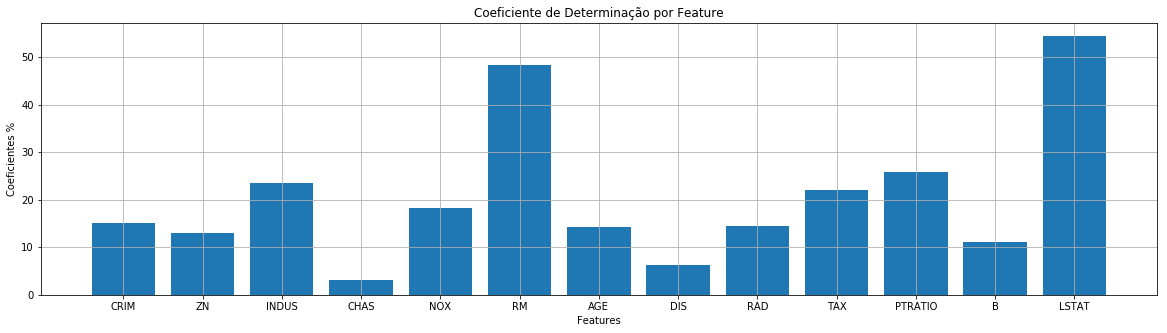

In [8]:
r = np.zeros(boston.feature_names.size)
regressor = LinearRegression()
for i in range(boston.feature_names.size):
    X_data = X[:, np.newaxis, i]
    r[i] = regressor.fit(X_data,y).score(X_data,y)


plt.figure(figsize=(20,5))
plt.title("Coeficiente de Determinação por Feature")
plt.bar(boston.feature_names, r * 100)
plt.xticks(boston.feature_names)
plt.xlabel("Features")
plt.ylabel("Coeficientes %")
plt.grid(True)
plt.show()



# Analisando a feature 6 - RM Numero médio de quartos por residência.

Utilizando um regressor linear, é possivel identificar que a feature numero 6, produz um coeficiente de determinação proximo do 48%.

Exibindo os dados do dataset em função do RM e do valor de cada ponto, podemos perceber a distribuição dos dados e que quanto maior o numero de quartos maior o preço do imovovel. 



Coeficiente de Determincao 0.48
Erro medio quadrado: 43.60
Erro medio Absoluto: 4.45


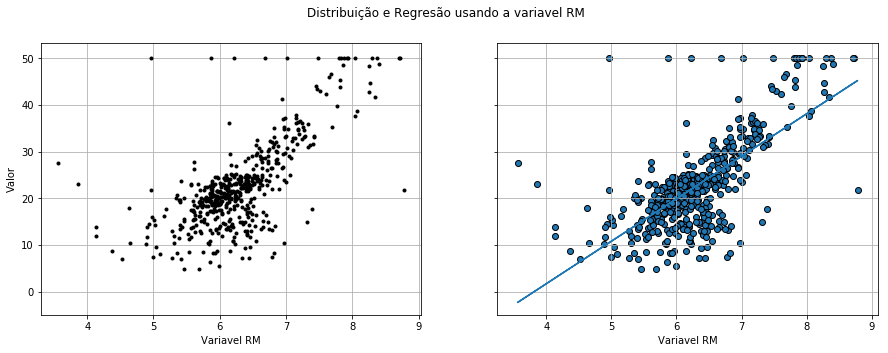

In [6]:
X_quartos = X[:,[5]]
regressor = LinearRegression()
regressaoQuartos = regressor.fit(X_quartos,y)
predicaoQuartos = regressaoQuartos.predict(X_quartos[:,:])

print("Coeficiente de Determincao %.2f" % regressaoQuartos.score(X_quartos,y))
print("Erro medio quadrado: %.2f" % mean_squared_error(y[:], predicaoQuartos))
print("Erro medio Absoluto: %.2f" % mean_absolute_error(y[:], predicaoQuartos))

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
ax[0].plot(X_quartos, y, "k.")
ax[0].set_xlabel("Variavel RM")
ax[0].set_ylabel("Valor")
ax[0].grid(True)

ax[1].plot(X_quartos, predicaoQuartos)
ax[1].scatter(X_quartos,y, edgecolors=(0, 0, 0))
ax[1].set_xlabel('Variavel RM')
ax[1].grid(True)

fig.suptitle("Distribuição e Regresão usando a variavel RM")
plt.show()

# Analisando a feature 13 - LSTAT Percentual de classes mais baixa.

Utilizando um regressor linear, é possivel identificar que a feature numero 13, produz um coeficiente de determinação proximo do 55%.

Exibindo os dados do dataset em função de LSTAT e do valor de cada ponto, podemos perceber que quanto maior o percentual de pessoas de baixa renda, menor o valor do imovel. 


Coeficiente de Determincao 0.54
Erro medio quadrado: 38.48
Erro medio Absoluto: 4.51


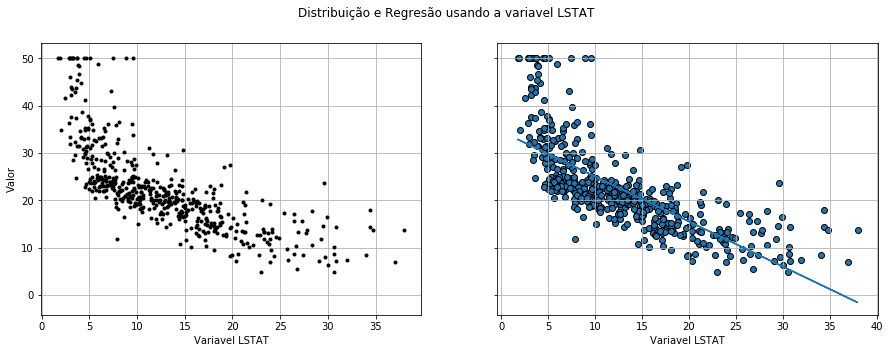

In [4]:
X_lstat = X[:,[12]]
regressor = LinearRegression()
regressaoLstat = regressor.fit(X_lstat,y)
predicaoLstat = regressaoLstat.predict(np.array(X_lstat[:,:]))

print("Coeficiente de Determincao %.2f" % regressaoLstat.score(X_lstat,y))
print("Erro medio quadrado: %.2f" % mean_squared_error(y[:], predicaoLstat))
print("Erro medio Absoluto: %.2f" % mean_absolute_error(y[:], predicaoLstat))

fig, ax = plt.subplots(1,2, figsize=(15, 5), sharey=True)
ax[0].plot(X_lstat, y, "k.")
ax[0].set_xlabel('Variavel LSTAT')
ax[0].set_ylabel('Valor')
ax[0].grid(True)

ax[1].plot(X_lstat, predicaoLstat)
ax[1].scatter(X_lstat,y, edgecolors=(0, 0, 0))
ax[1].set_xlabel('Variavel LSTAT')

ax[1].grid(True)
fig.suptitle("Distribuição e Regresão usando a variavel LSTAT")
plt.show()

### Usando as Features 6 e 13 Para a regressão.

In [7]:
from sklearn.model_selection import train_test_split

# Recuperando somente a features 5 e 13
X_data = X[:,[5,12]]

#Dividindo os dados de teste em 70% para treino e 30% para teste.
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.30, random_state=42)

# Buscando por hiperparametros Usando Busca em Gride 
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = svm.SVR(gamma=0.1)
clf = GridSearchCV(svr, parameters, cv=5)
clf.fit(X_data, y)
# sorted(clf.cv_results_.keys())

# regressor = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
regressor = svm.SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
regressao = regressor.fit(X_train, y_train)

y_train_predictSVR = regressao.predict(np.array(X_train[:,:]))
y_test_predictSVR = regressao.predict(np.array(X_test[:,:]))

print("SVR - Erro medio quadrado-  Treino: %.2f" % mean_squared_error(y_train[:], y_train_predictSVR))
print("SVR - Erro medio Absoluto - Treino: %.2f" % mean_absolute_error(y_train[:], y_train_predictSVR))
print("SVR - Erro medio quadrado - Validacao: %.2f" % mean_squared_error(y_test[:], y_test_predictSVR))
print("SVR - Erro medio Absoluto - Validacao: %.2f" % mean_absolute_error(y_test[:], y_test_predictSVR))



SVR - Erro medio quadrado-  Treino: 27.61
SVR - Erro medio Absoluto - Treino: 3.44
SVR - Erro medio quadrado - Validacao: 25.40
SVR - Erro medio Absoluto - Validacao: 3.42


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
